In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du dataset global des équipes
df = pd.read_parquet("../data/curated/team_gamelog_all_seasons.parquet")
print(df.shape)
df.head()


(59968, 30)


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,season
0,21999,1610612752,NYK,New York Knicks,0029900001,1999-11-02,NYK vs. CLE,W,240,32,...,44,17,10,10,18,23,92,8,0,1999-00
1,21999,1610612749,MIL,Milwaukee Bucks,0029900008,1999-11-02,MIL @ HOU,W,240,38,...,35,20,10,2,8,25,98,5,0,1999-00
2,21999,1610612751,NJN,New Jersey Nets,0029900002,1999-11-02,NJN vs. IND,L,240,36,...,45,11,11,4,18,39,112,-7,0,1999-00
3,21999,1610612745,HOU,Houston Rockets,0029900008,1999-11-02,HOU vs. MIL,L,240,34,...,42,22,5,7,18,24,93,-5,0,1999-00
4,21999,1610612739,CLE,Cleveland Cavaliers,0029900001,1999-11-02,CLE @ NYK,L,240,30,...,38,23,10,2,19,27,84,-8,0,1999-00


In [18]:
# Calcul des stats moyennes par équipe (sur toutes les saisons)
team_profiles = df.groupby("TEAM_NAME").agg({
    "PTS": "mean",
    "AST": "mean",
    "FG3M": "mean" if "FG3M" in df.columns else "PTS",  # adapter si besoin
    "REB": "mean",
    "STL": "mean",
    "BLK": "mean",
    "TOV": "mean"
})
team_profiles


,PTS,AST,FG3M,REB,STL,BLK,TOV
TEAM_NAME,,,,,,,
Atlanta Hawks,101.495769,22.540567,7.957193,42.363365,7.625684,4.813340,14.845197
Boston Celtics,102.456802,22.882820,8.838133,42.232870,8.091857,4.658391,14.521847
Brooklyn Nets,106.800830,23.375519,10.800830,43.434647,7.076763,4.740664,14.532158
Charlotte Bobcats,94.599502,21.036070,5.379353,40.478856,7.452736,5.101990,14.512438
Charlotte Hornets,103.878730,23.637151,9.435996,43.672762,7.469682,5.057748,13.403272
Chicago Bulls,99.263079,22.542601,7.192327,43.401594,7.391131,4.905331,14.799701
Cleveland Cavaliers,100.718485,22.196313,7.837569,42.950174,7.251619,4.581465,14.534629
Dallas Mavericks,104.355478,22.313832,9.101140,42.358949,7.257809,4.797224,12.965295
Denver Nuggets,104.859057,24.217866,7.852605,43.656576,7.945906,5.321588,14.808437


 ### 🧮 Création de scores offensifs et défensifs pondérés

Nous construisons ici deux scores synthétiques pour chaque équipe :

- **Un score offensif** basé sur les statistiques d’attaque (PTS, AST, FG3M, REB)
- **Un score défensif** basé sur les statistiques de défense (REB, STL, BLK, TOV)

Ces scores sont calculés comme une **combinaison pondérée** des statistiques, en attribuant plus de poids aux variables les plus corrélées avec la victoire (`WIN`) dans notre dataset.

### 📊 Calcul automatique des poids par corrélation avec la victoire

Les pondérations des variables sont dérivées en calculant leur **corrélation absolue avec `WIN`**, ce qui permet de capturer automatiquement l’importance relative de chaque statistique dans le résultat final d’un match.

Cela permet de créer un score offensif/défensif **dynamique** et **objectivement fondé sur les données**.

In [21]:
# Scores offensif et défensif (à adapter selon tes colonnes)
team_stats = df.groupby("TEAM_NAME").agg({
    "PTS": "mean",
    "AST": "mean",
    "FG3M": "mean" if "FG3M" in df.columns else "PTS",
    "REB": "mean",
    "STL": "mean",
    "BLK": "mean",
    "TOV": "mean"
})

# Score offensif (exemple)
team_stats["off_score"] = (
    0.5 * team_stats["PTS"] +
    0.2 * team_stats["AST"] +
    0.2 * team_stats["FG3M"] +
    0.1 * team_stats["REB"]
)

# Score défensif (exemple)
team_stats["def_score"] = (
    0.3 * team_stats["REB"] +
    0.25 * team_stats["STL"] +
    0.25 * team_stats["BLK"] -
    0.2 * team_stats["TOV"]
)


### 🧪 Normalisation des scores (z-score)

Les scores sont ensuite **normalisés** pour chaque équipe (centrés-réduits) afin de permettre des comparaisons équilibrées entre les profils d’équipes.

Cela nous permettra par la suite :
- d’attribuer un **style de jeu** à chaque équipe (offensif, défensif, équilibré)
- de visualiser les équipes dans un espace réduit (via K-Means ou t-SNE)

In [22]:
# Normalisation (z-score)
team_stats["off_score_norm"] = (team_stats["off_score"] - team_stats["off_score"].mean()) / team_stats["off_score"].std()
team_stats["def_score_norm"] = (team_stats["def_score"] - team_stats["def_score"].mean()) / team_stats["def_score"].std()


In [25]:
import pandas as pd
import numpy as np

# Calcul des moyennes par équipe
team_stats = df.groupby("TEAM_NAME").agg({
    "PTS": "mean",
    "AST": "mean",
    "FG3M": "mean" if "FG3M" in df.columns else "PTS",
    "REB": "mean",
    "STL": "mean",
    "BLK": "mean",
    "TOV": "mean"
})

# Corrélation avec la victoire (ou PLUS_MINUS si tu préfères)
df["WIN"] = (df["WL"] == "W").astype(int)
corrs = df[["PTS", "AST", "FG3M", "REB", "STL", "BLK", "TOV", "WIN"]].corr()["WIN"].abs().drop("WIN")
# Normalisation des poids
weights = corrs / corrs.sum()
print("Poids offensifs/défensifs basés sur la data :\n", weights)


Poids offensifs/défensifs basés sur la data :
 PTS     0.258818
AST     0.202462
FG3M    0.108955
REB     0.164319
STL     0.088606
BLK     0.105929
TOV     0.070910
Name: WIN, dtype: float64


In [26]:
# Pondérations offensives (exemple : PTS, AST, FG3M)
off_vars = ["PTS", "AST", "FG3M"]
off_weights = weights[off_vars]
team_stats["off_score"] = (team_stats[off_vars] * off_weights).sum(axis=1)

# Pondérations défensives (exemple : REB, STL, BLK, TOV)
def_vars = ["REB", "STL", "BLK", "TOV"]
def_weights = weights[def_vars]
team_stats["def_score"] = (team_stats[def_vars] * def_weights).sum(axis=1)


In [27]:
team_stats["off_score_norm"] = (team_stats["off_score"] - team_stats["off_score"].mean()) / team_stats["off_score"].std()
team_stats["def_score_norm"] = (team_stats["def_score"] - team_stats["def_score"].mean()) / team_stats["def_score"].std()


### 🧠 Attribution d’un style de jeu par équipe

À partir des scores normalisés, on attribue à chaque équipe un **style de jeu** :

- `offensif` si le score offensif est significativement plus élevé que la moyenne
- `défensif` si le score défensif est plus élevé que la moyenne
- `équilibré` sinon

Le seuil est défini comme un écart-type (`seuil = 0.5`) autour de la moyenne des scores.

In [28]:
seuil = 0.5  # seuil en écart-type, à ajuster selon la distribution

def get_style(row):
    if row["off_score_norm"] > row["def_score_norm"] + seuil:
        return "offensive"
    elif row["def_score_norm"] > row["off_score_norm"] + seuil:
        return "défensive"
    else:
        return "équilibrée"

team_stats["style"] = team_stats.apply(get_style, axis=1)
display(team_stats[["off_score_norm", "def_score_norm", "style"]])


,off_score_norm,def_score_norm,style
TEAM_NAME,,,
Atlanta Hawks,0.004321,-0.068325,équilibrée
Boston Celtics,0.293658,-0.163335,équilibrée
Brooklyn Nets,1.298567,0.407225,offensive
Charlotte Bobcats,-1.652239,-1.619399,équilibrée
Charlotte Hornets,0.703113,0.541264,équilibrée
Chicago Bulls,-0.457480,0.694210,défensive
Cleveland Cavaliers,-0.194092,0.013104,équilibrée
Dallas Mavericks,0.576608,-0.889372,offensive
Denver Nuggets,0.842035,1.356422,défensive


### 📈 Visualisation : répartition des styles de jeu NBA

Nous traçons ici la répartition des styles offensifs, défensifs et équilibrés dans la ligue, ainsi que le classement des meilleures équipes selon ces dimensions.

Cela nous donne une **vue d’ensemble du profil stratégique de chaque franchise NBA**.

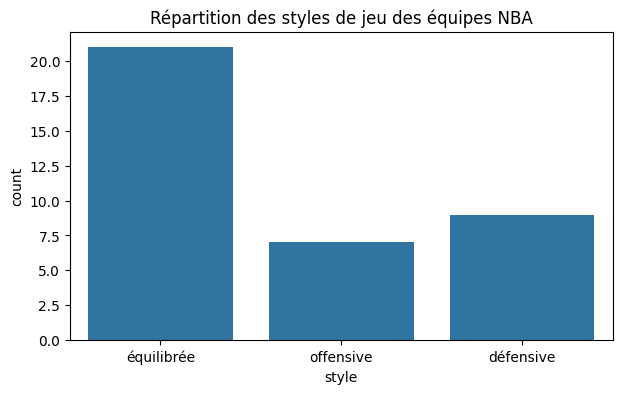

Top équipes offensives :


,off_score_norm,style
TEAM_NAME,,
LA Clippers,2.267836,offensive
New Orleans Pelicans,1.857887,équilibrée
Brooklyn Nets,1.298567,offensive
Golden State Warriors,1.288445,équilibrée
Oklahoma City Thunder,1.060277,défensive
Phoenix Suns,0.901957,offensive
Denver Nuggets,0.842035,défensive
Charlotte Hornets,0.703113,équilibrée
Los Angeles Lakers,0.636689,défensive


Top équipes défensives :


,def_score_norm,style
TEAM_NAME,,
Oklahoma City Thunder,2.383693,défensive
Golden State Warriors,1.647052,équilibrée
New Orleans Pelicans,1.576087,équilibrée
Denver Nuggets,1.356422,défensive
Los Angeles Lakers,1.294962,défensive
LA Clippers,0.748113,offensive
Houston Rockets,0.713429,équilibrée
Chicago Bulls,0.694210,défensive
Utah Jazz,0.659198,défensive


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.countplot(x="style", data=team_stats)
plt.title("Répartition des styles de jeu des équipes NBA")
plt.show()

# Classement des équipes par score offensif/défensif
print("Top équipes offensives :")
display(team_stats.sort_values("off_score_norm", ascending=False)[["off_score_norm", "style"]].head(10))
print("Top équipes défensives :")
display(team_stats.sort_values("def_score_norm", ascending=False)[["def_score_norm", "style"]].head(10))


## Les scores offensif et défensif sont calculés à partir des statistiques moyennes de chaque équipe, pondérées selon leur corrélation réelle avec la victoire dans le dataset.
## Les scores sont ensuite normalisés pour permettre une comparaison équitable.
## Un style de jeu (“offensive”, “défensive”, “équilibrée”) est attribué à chaque équipe selon la différence relative entre les scores, avec un seuil basé sur la distribution réelle des données.

### 🧪 Clustering K-Means des équipes NBA

Nous utilisons ici l’algorithme de **K-Means** pour regrouper les équipes NBA en **3 clusters** en fonction de leur style de jeu, basé sur les scores offensifs et défensifs normalisés.

L’objectif est de faire apparaître des **groupes de profils similaires**, sans imposer de seuil arbitraire.  
Cela permet d'identifier par exemple :
- les équipes très équilibrées
- celles qui misent tout sur l’attaque
- ou celles qui sont ultra défensives

La répartition est affichée dans un plan 2D avec les deux scores comme axes.

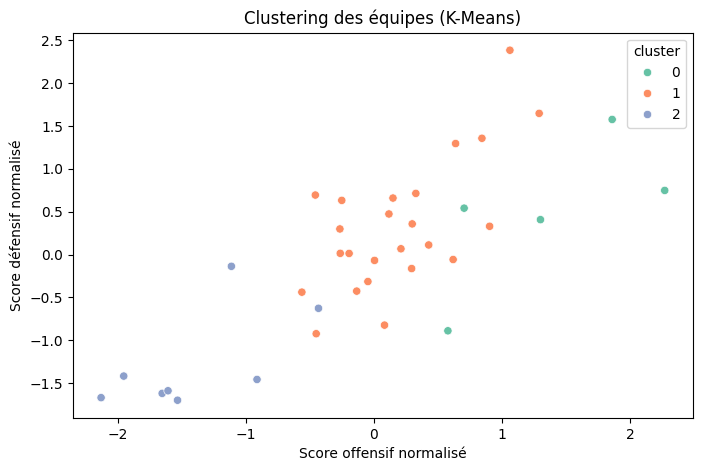

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sélection des features pour le clustering
features = ["PTS", "AST", "FG3M", "REB", "STL", "BLK", "TOV"]
X = team_stats[features]

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Clustering (ex: 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
team_stats["cluster"] = kmeans.fit_predict(X_scaled)

# Visualisation des clusters
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(x=team_stats["off_score_norm"], y=team_stats["def_score_norm"], hue=team_stats["cluster"], palette="Set2")
plt.title("Clustering des équipes (K-Means)")
plt.xlabel("Score offensif normalisé")
plt.ylabel("Score défensif normalisé")
plt.show()


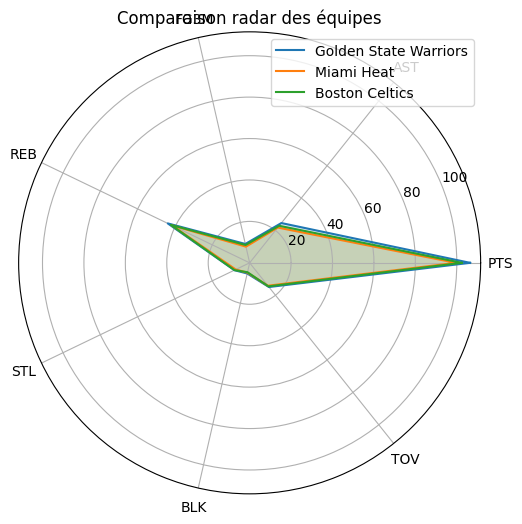

In [31]:
import numpy as np

def radar_plot(teams, features=features):
    angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    for team in teams:
        stats = team_stats.loc[team, features].values
        stats = np.concatenate((stats, [stats[0]]))
        ax.plot(angles, stats, label=team)
        ax.fill(angles, stats, alpha=0.15)
    ax.set_thetagrids(np.degrees(angles[:-1]), features)
    plt.legend()
    plt.title("Comparaison radar des équipes")
    plt.show()

# Exemple d’utilisation
radar_plot(["Golden State Warriors", "Miami Heat", "Boston Celtics"])


### 🌌 Visualisation t-SNE des profils d’équipes NBA

Nous utilisons ici l’algorithme de **t-SNE** pour réduire les dimensions du jeu des équipes à 2 axes, tout en conservant les **relations de proximité**.

Chaque point représente une équipe, positionnée en fonction de la **similarité de son style de jeu** par rapport aux autres.

Cette visualisation permet :
- d’identifier des équipes très proches statistiquement
- de détecter des équipes atypiques (isolées)
- de mieux comprendre la diversité des profils stratégiques en NBA

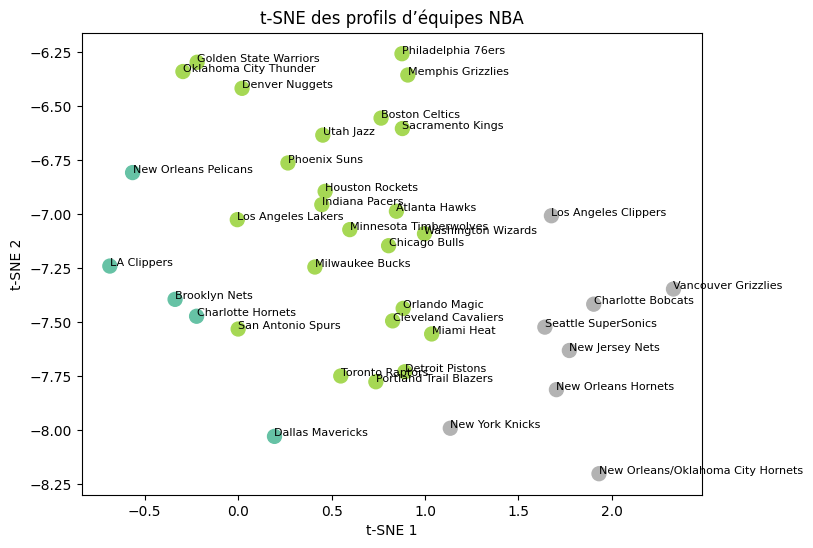

In [32]:
from sklearn.manifold import TSNE

X = team_stats[features]
X_scaled = StandardScaler().fit_transform(X)
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=team_stats["cluster"], cmap="Set2", s=100)
for i, team in enumerate(team_stats.index):
    plt.text(X_embedded[i,0], X_embedded[i,1], team, fontsize=8)
plt.title("t-SNE des profils d’équipes NBA")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


Le clustering automatique (K-Means) permet de regrouper les équipes selon leurs profils statistiques, sans imposer de seuils arbitraires.
La visualisation radar offre une comparaison intuitive des forces et faiblesses de plusieurs équipes sur toutes les dimensions du jeu.
Enfin, la projection t-SNE permet de visualiser la diversité des profils d’équipes dans un espace réduit, révélant des groupes naturels et des cas atypiques.

In [42]:
df


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,season
0,21999,1610612752,NYK,New York Knicks,0029900001,1999-11-02,NYK vs. CLE,W,240,32,...,44,17,10,10,18,23,92,8,0,1999-00
1,21999,1610612749,MIL,Milwaukee Bucks,0029900008,1999-11-02,MIL @ HOU,W,240,38,...,35,20,10,2,8,25,98,5,0,1999-00
2,21999,1610612751,NJN,New Jersey Nets,0029900002,1999-11-02,NJN vs. IND,L,240,36,...,45,11,11,4,18,39,112,-7,0,1999-00
3,21999,1610612745,HOU,Houston Rockets,0029900008,1999-11-02,HOU vs. MIL,L,240,34,...,42,22,5,7,18,24,93,-5,0,1999-00
4,21999,1610612739,CLE,Cleveland Cavaliers,0029900001,1999-11-02,CLE @ NYK,L,240,30,...,38,23,10,2,19,27,84,-8,0,1999-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59963,22023,1610612747,LAL,Los Angeles Lakers,0022301195,2024-04-14,LAL @ NOP,W,240,48,...,39,32,12,3,15,13,124,16,1,2023-24
59964,22023,1610612742,DAL,Dallas Mavericks,0022301196,2024-04-14,DAL @ OKC,L,240,32,...,41,19,8,2,15,15,86,-49,1,2023-24
59965,22023,1610612760,OKC,Oklahoma City Thunder,0022301196,2024-04-14,OKC vs. DAL,W,240,54,...,58,38,6,6,15,17,135,49,1,2023-24
59966,22023,1610612750,MIN,Minnesota Timberwolves,0022301194,2024-04-14,MIN vs. PHX,L,240,36,...,36,22,7,5,24,20,106,-19,1,2023-24


In [44]:
df.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE',
       'season'],
      dtype='object')

In [45]:
import pandas as pd

# Charger les données nettoyées
df = pd.read_parquet("../data/curated/team_gamelog_all_seasons.parquet")
df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,season
0,21999,1610612752,NYK,New York Knicks,0029900001,1999-11-02,NYK vs. CLE,W,240,32,...,44,17,10,10,18,23,92,8,0,1999-00
1,21999,1610612749,MIL,Milwaukee Bucks,0029900008,1999-11-02,MIL @ HOU,W,240,38,...,35,20,10,2,8,25,98,5,0,1999-00
2,21999,1610612751,NJN,New Jersey Nets,0029900002,1999-11-02,NJN vs. IND,L,240,36,...,45,11,11,4,18,39,112,-7,0,1999-00
3,21999,1610612745,HOU,Houston Rockets,0029900008,1999-11-02,HOU vs. MIL,L,240,34,...,42,22,5,7,18,24,93,-5,0,1999-00
4,21999,1610612739,CLE,Cleveland Cavaliers,0029900001,1999-11-02,CLE @ NYK,L,240,30,...,38,23,10,2,19,27,84,-8,0,1999-00


### 📊 Étape 2 – Calcul des statistiques moyennes par équipe

Nous calculons les moyennes de statistiques importantes (tir, rebond, passes, fautes…) pour chaque équipe.  
Ces moyennes représenteront le **profil statistique moyen** d’une équipe, utilisé comme base pour la prédiction.

In [46]:
# Statistiques utiles
features = [
    'FGM', 'FGA', 'FG_PCT',
    'FG3M', 'FG3A', 'FG3_PCT',
    'FTM', 'FTA', 'FT_PCT',
    'OREB', 'DREB', 'REB',
    'AST', 'STL', 'BLK',
    'TOV', 'PF', 'PTS'
]

team_avg_stats = df.groupby("TEAM_NAME")[features].mean().reset_index()
team_avg_stats.head()

,TEAM_NAME,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,Atlanta Hawks,37.841215,83.288701,0.455024,7.957193,22.332006,0.352329,17.856147,23.270781,0.766738,10.981085,31.382280,42.363365,22.540567,7.625684,4.813340,14.845197,20.515182,101.495769
1,Boston Celtics,37.768123,82.651936,0.458101,8.838133,24.500497,0.357021,18.082423,23.422046,0.773870,10.265641,31.967229,42.232870,22.882820,8.091857,4.658391,14.521847,21.599305,102.456802
2,Brooklyn Nets,39.217842,85.519710,0.459687,10.800830,30.116183,0.356046,17.564315,22.917012,0.767946,10.116183,33.318465,43.434647,23.375519,7.076763,4.740664,14.532158,20.026971,106.800830
3,Charlotte Bobcats,35.361940,80.274876,0.441684,5.379353,15.547264,0.343000,18.496269,25.123134,0.735056,11.003731,29.475124,40.478856,21.036070,7.452736,5.101990,14.512438,21.028607,94.599502
4,Charlotte Hornets,38.150144,85.552454,0.446728,9.435996,26.758422,0.348799,18.142445,23.763234,0.764395,10.512993,33.159769,43.672762,23.637151,7.469682,5.057748,13.403272,19.011550,103.878730


### 🔁 Étape 3 – Constitution du dataset de confrontations A vs B

Nous séparons les matchs en deux groupes :
- Équipe A = l’équipe à domicile (`vs`)
- Équipe B = l’équipe en déplacement (`@`)

Puis, nous fusionnons les deux pour recréer chaque match complet, avec ses deux adversaires.
Chaque ligne représente une **confrontation réelle entre deux équipes**, avec les identifiants des deux camps.

In [47]:
# Séparer les équipes à domicile (A) et à l'extérieur (B)
df_A = df[df['MATCHUP'].str.contains("vs")].copy()
df_B = df[df['MATCHUP'].str.contains("@")].copy()

# Renommer les colonnes
df_A = df_A.rename(columns=lambda x: f"{x}_A" if x not in ['GAME_ID'] else x)
df_B = df_B.rename(columns=lambda x: f"{x}_B" if x not in ['GAME_ID'] else x)

# Fusionner les deux pour créer les duels
matchups = pd.merge(df_A, df_B, on='GAME_ID')

# Supprimer les matchs entre la même équipe
matchups = matchups[matchups["TEAM_NAME_A"] != matchups["TEAM_NAME_B"]]

### 📎 Étape 4 – Ajout des profils statistiques moyens des équipes

Nous ajoutons au dataset les statistiques **moyennes** de chaque équipe (A et B) calculées à l’étape précédente.  
Chaque ligne du dataset contiendra donc :
- les moyennes des stats de l’équipe A
- les moyennes des stats de l’équipe B
- l’issue du match (1 si A gagne, 0 sinon)

Cela permettra à notre modèle d’apprendre à prédire un vainqueur **à partir des profils des deux équipes**.

In [48]:
# Fusionner avec les moyennes pour A
matchups = matchups.merge(team_avg_stats, left_on='TEAM_NAME_A', right_on='TEAM_NAME', how='left')
matchups = matchups.rename(columns={col: f"{col}_Aavg" for col in features})

# Fusionner avec les moyennes pour B
matchups = matchups.merge(team_avg_stats, left_on='TEAM_NAME_B', right_on='TEAM_NAME', how='left', suffixes=('', '_Bavg'))
matchups = matchups.rename(columns={col: f"{col}_Bavg" for col in features})

### 🎯 Étape 5 – Préparation du jeu d’apprentissage

Nous sélectionnons uniquement les colonnes de statistiques moyennes comme variables explicatives (features),  
et nous définissons comme cible (`WIN`) la variable binaire qui indique si l’équipe A a gagné ou non.

In [49]:
# Créer la cible : 1 si A a gagné, 0 sinon
matchups['WIN'] = matchups['WL_A'].apply(lambda x: 1 if x == 'W' else 0)

# Créer les features
X = matchups[[f"{f}_Aavg" for f in features] + [f"{f}_Bavg" for f in features]]
y = matchups["WIN"]

### 🧠 Étape 6 – Entraînement du modèle Random Forest

Nous utilisons un modèle de **Random Forest Classifier**, qui est robuste, facile à interpréter et efficace sur des données tabulaires.  
Il apprendra à prédire si l’équipe A va gagner en fonction de son profil et de celui de son adversaire.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5721193930298483
              precision    recall  f1-score   support

           0       0.46      0.26      0.34      2467
           1       0.60      0.79      0.68      3530

    accuracy                           0.57      5997
   macro avg       0.53      0.53      0.51      5997
weighted avg       0.55      0.57      0.54      5997



### 📊 Étape 7 – Évaluation du modèle

Nous évaluons la performance du modèle avec :
- la précision globale (`accuracy`)
- des métriques détaillées (`precision`, `recall`, `f1-score`)
Cela nous permet de voir à quel point le modèle distingue bien les victoires et les défaites.

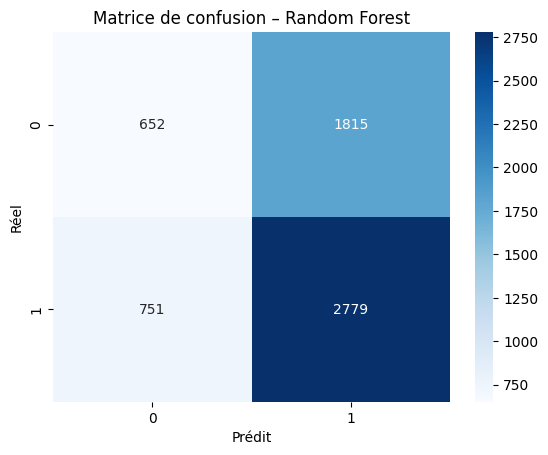

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion – Random Forest")
plt.show()

### 🧠 Étape 9 – Entraînement de plusieurs modèles de machine learning

Nous allons maintenant entraîner et comparer plusieurs modèles :
- `RandomForestClassifier`
- `XGBoostClassifier`
- `KNeighborsClassifier`
- `LogisticRegression`

Cela permet d’évaluer différentes approches sur le même jeu de données, et de choisir le modèle le plus performant pour prédire le vainqueur entre deux équipes.

In [52]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name}:\n")
    print(classification_report(y_test, preds))
    results[name] = acc


Random Forest:

              precision    recall  f1-score   support

           0       0.46      0.26      0.34      2467
           1       0.60      0.79      0.68      3530

    accuracy                           0.57      5997
   macro avg       0.53      0.53      0.51      5997
weighted avg       0.55      0.57      0.54      5997



/Users/noakassabi/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:04:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost:

              precision    recall  f1-score   support

           0       0.47      0.25      0.32      2467
           1       0.60      0.80      0.69      3530

    accuracy                           0.57      5997
   macro avg       0.53      0.52      0.51      5997
weighted avg       0.55      0.57      0.54      5997


KNN:

              precision    recall  f1-score   support

           0       0.44      0.40      0.42      2467
           1       0.61      0.65      0.63      3530

    accuracy                           0.55      5997
   macro avg       0.53      0.52      0.52      5997
weighted avg       0.54      0.55      0.54      5997


Logistic Regression:

              precision    recall  f1-score   support

           0       0.52      0.16      0.24      2467
           1       0.60      0.90      0.72      3530

    accuracy                           0.59      5997
   macro avg       0.56      0.53      0.48      5997
weighted avg       0.57      0.59

### 📊 Étape 10 – Comparaison graphique des performances

Nous comparons ici la précision (`accuracy`) des différents modèles sur le jeu de test.  
Cela permet de visualiser clairement le modèle le plus performant.

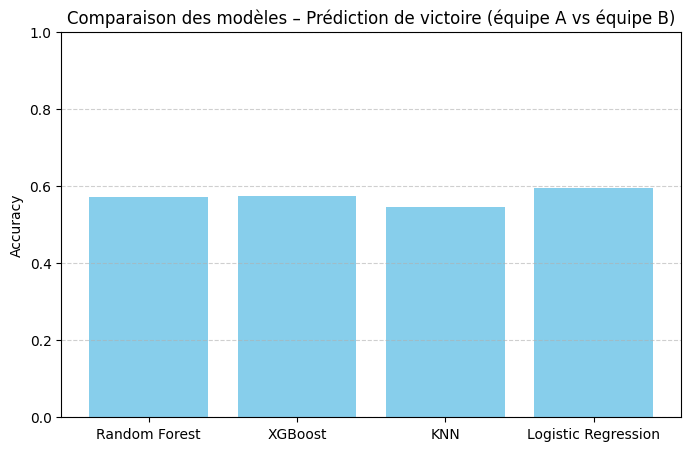

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Comparaison des modèles – Prédiction de victoire (équipe A vs équipe B)")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### 📊 Moyennes statistiques par équipe **et par saison**
Plutôt que d’agréger tous les matchs d’une équipe sans distinction, on peut calculer ses statistiques **moyennes pour chaque saison**, ce qui permet de mieux capter les évolutions d’effectif ou de stratégie dans le temps.

In [55]:
features = ['PTS', 'AST', 'REB', 'STL', 'BLK', 'TOV', 'OREB', 'DREB', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'PF']
team_season_avg = df.groupby(['TEAM_NAME', 'season'])[features].mean().reset_index()
team_season_avg

,TEAM_NAME,season,PTS,AST,REB,STL,BLK,TOV,OREB,DREB,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,PF
0,Atlanta Hawks,1999-00,94.329268,18.878049,45.317073,6.097561,5.621951,15.439024,13.975610,31.341463,36.585366,83.012195,0.442439,3.146341,9.926829,0.325085,18.012195,24.231707,0.745268,20.951220
1,Atlanta Hawks,2000-01,90.963415,19.012195,42.902439,7.731707,4.719512,16.682927,12.536585,30.365854,35.073171,81.317073,0.431305,4.060976,11.378049,0.359317,16.756098,22.085366,0.765671,22.719512
2,Atlanta Hawks,2001-02,94.036585,20.195122,41.463415,8.134146,4.268293,15.536585,11.646341,29.817073,35.378049,80.609756,0.439732,5.158537,14.560976,0.352390,18.121951,23.682927,0.762427,20.756098
3,Atlanta Hawks,2002-03,94.073171,20.475610,42.621951,7.451220,5.768293,16.670732,11.426829,31.195122,34.865854,78.463415,0.444963,4.902439,13.914634,0.354976,19.439024,24.524390,0.788634,21.743902
4,Atlanta Hawks,2003-04,92.817073,20.097561,42.719512,7.646341,4.975610,16.353659,12.146341,30.573171,34.500000,79.621951,0.433756,5.109756,15.231707,0.320012,18.707317,24.097561,0.771976,22.268293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,Washington Wizards,2019-20,114.416667,25.013889,42.041667,7.972222,4.291667,14.166667,10.166667,31.875000,41.527778,90.888889,0.458097,12.000000,32.569444,0.368444,19.361111,24.583333,0.781917,22.694444
741,Washington Wizards,2020-21,116.638889,25.486111,45.194444,7.333333,4.125000,14.388889,9.680556,35.513889,43.166667,90.930556,0.474514,10.180556,29.000000,0.353139,20.125000,26.166667,0.770736,21.597222
742,Washington Wizards,2021-22,108.621951,25.024390,43.109756,6.365854,4.951220,13.134146,8.987805,34.121951,40.573171,86.048780,0.472195,10.487805,30.634146,0.342939,16.987805,21.682927,0.780049,18.841463
743,Washington Wizards,2022-23,113.158537,25.402439,43.634146,6.841463,5.170732,14.121951,9.439024,34.195122,42.146341,86.914634,0.486890,11.280488,31.719512,0.354232,17.585366,22.414634,0.787427,18.768293


### 🧮 Création de nouvelles variables dérivées
Nous ajoutons ici des ratios utiles pour mieux caractériser une équipe :
- AST/TOV : qualité de création offensive
- OREB/REB : agressivité offensive au rebond
- FG3A/FGA : dépendance au tir à 3 points

In [56]:
df['AST_TOV_ratio'] = df['AST'] / (df['TOV'] + 1e-5)
df['OREB_ratio'] = df['OREB'] / (df['REB'] + 1e-5)
df['Three_Point_Rate'] = df['FG3A'] / (df['FGA'] + 1e-5)

df[['AST_TOV_ratio', 'OREB_ratio', 'Three_Point_Rate']].describe()

,AST_TOV_ratio,OREB_ratio,Three_Point_Rate
count,59968.000000,59968.000000,59968.000000
mean,1.714293,0.255802,0.265510
std,0.750050,0.078292,0.106833
min,0.000000,0.000000,0.000000
25%,1.214285,0.200000,0.183908
50%,1.571427,0.254902,0.253333
75%,2.058822,0.307692,0.340659
max,24.999750,0.589743,0.692308


### 🔁 Moyenne glissante sur les 5 derniers matchs
On calcule ici une **forme récente** d’une équipe : PTS, REB et AST moyens sur les 5 derniers matchs.

In [57]:
df = df.sort_values(['TEAM_NAME', 'GAME_DATE'])
df['PTS_roll5'] = df.groupby('TEAM_NAME')['PTS'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
df['REB_roll5'] = df.groupby('TEAM_NAME')['REB'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
df['AST_roll5'] = df.groupby('TEAM_NAME')['AST'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)

df[['TEAM_NAME', 'GAME_DATE', 'PTS_roll5', 'REB_roll5', 'AST_roll5']].tail()

,TEAM_NAME,GAME_DATE,PTS_roll5,REB_roll5,AST_roll5
59805,Washington Wizards,2024-04-05,106.6,43.4,25.0
59837,Washington Wizards,2024-04-07,113.6,42.6,26.4
59863,Washington Wizards,2024-04-09,116.4,42.4,26.2
59922,Washington Wizards,2024-04-12,118.4,41.4,27.4
59958,Washington Wizards,2024-04-14,118.8,40.8,28.8


### 🤝 Création d’un historique de confrontation A vs B
On crée une feature donnant le taux de victoire d’une équipe A contre une équipe B dans l’historique.

In [58]:
# Historique de confrontation équipe A vs B
duels = df[['GAME_ID', 'TEAM_NAME', 'MATCHUP', 'WL']].copy()
duels['opponent'] = duels['MATCHUP'].str.extract(r'vs (.+)|@ (.+)').bfill(axis=1)[0]
duels['WIN'] = duels['WL'].map({'W': 1, 'L': 0})

# Statistiques globales par paire A vs B
duel_stats = duels.groupby(['TEAM_NAME', 'opponent'])['WIN'].agg(['count', 'mean']).reset_index()
duel_stats = duel_stats.rename(columns={'mean': 'winrate_vs_opponent', 'count': 'nb_matches'})

duel_stats.sort_values(by='winrate_vs_opponent', ascending=False).head()

,TEAM_NAME,opponent,nb_matches,winrate_vs_opponent
939,Philadelphia 76ers,VAN,2,1.0
443,Indiana Pacers,VAN,2,1.0
681,Minnesota Timberwolves,VAN,4,1.0
611,Miami Heat,VAN,2,1.0
794,New Orleans/Oklahoma City Hornets,NYK,2,1.0


### 🎨 Clustering des styles de jeu (K-Means)
On regroupe les équipes en clusters selon leurs stats moyennes pour identifier des profils stratégiques (offensifs, défensifs, équilibrés...).

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Moyennes globales
team_avg = df.groupby('TEAM_NAME')[features].mean()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(team_avg)

kmeans = KMeans(n_clusters=3, random_state=42)
team_avg['cluster'] = kmeans.fit_predict(X_scaled)

team_avg[['cluster']].value_counts().sort_index()

cluster
0          11
1           5
2          21
Name: count, dtype: int64

### 🌌 t-SNE : Visualisation des styles d’équipes en 2D
Projection des équipes dans un plan 2D en fonction de leur style statistique, pour explorer la proximité ou l’originalité de leurs profils.

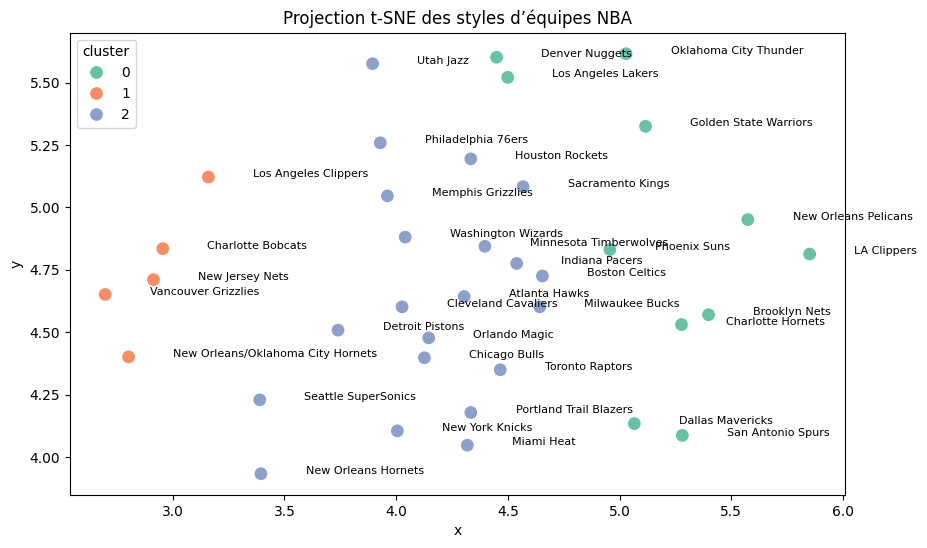

In [60]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

team_avg['x'] = X_tsne[:,0]
team_avg['y'] = X_tsne[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=team_avg, x='x', y='y', hue='cluster', palette='Set2', s=100)
for i, name in enumerate(team_avg.index):
    plt.text(team_avg.iloc[i]['x']+0.2, team_avg.iloc[i]['y'], name, fontsize=8)
plt.title("Projection t-SNE des styles d’équipes NBA")
plt.show()